In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [52]:
df=pd.read_csv('D:\Data Project/hotel_booking.csv')

In [53]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [54]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,Transient,140.75,0,1,Check-Out,2017-09-04,Wanda Jones,Wanda_J@yandex.com,379-374-7947,************8581
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,Transient,99.00,0,0,Check-Out,2017-09-05,Betty Taylor,BTaylor@yandex.com,114-632-1395,************1795
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,Transient,209.00,0,0,Check-Out,2017-09-05,Cesar Moreno,Cesar_M50@comcast.net,666-379-7260,************7835
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,Transient,87.60,0,0,Check-Out,2017-09-06,Jose Andersen,Andersen_Jose@protonmail.com,656-714-5930,************7923
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,Transient,96.14,0,2,Check-Out,2017-09-06,James Mccarty,James_M@att.com,689-204-7523,************7994
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [55]:
df.shape

(119390, 36)

In [56]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [58]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [59]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [60]:
mode_hotel = df['hotel'].mode().iloc[0]
print("Mode Hotel:", mode_hotel)

Mode Hotel: City Hotel


# Data Visualization

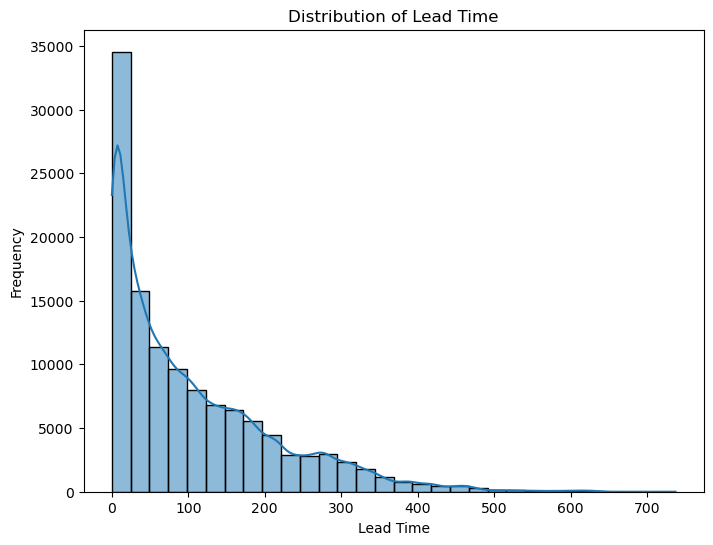

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

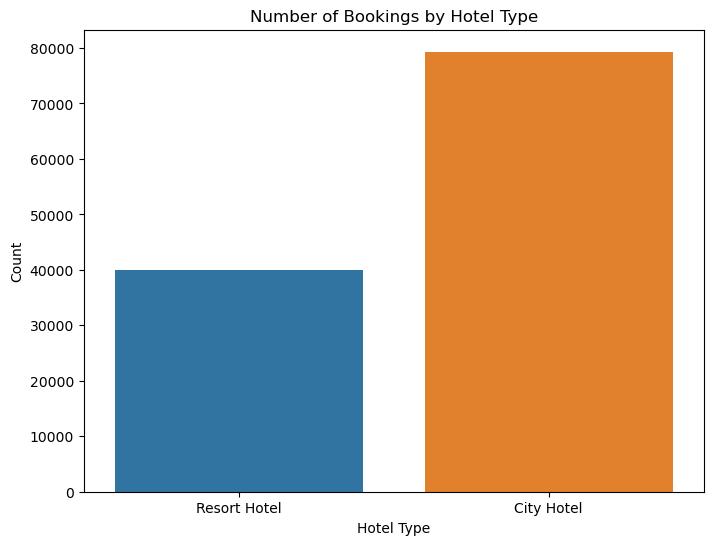

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(df, x='hotel')
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

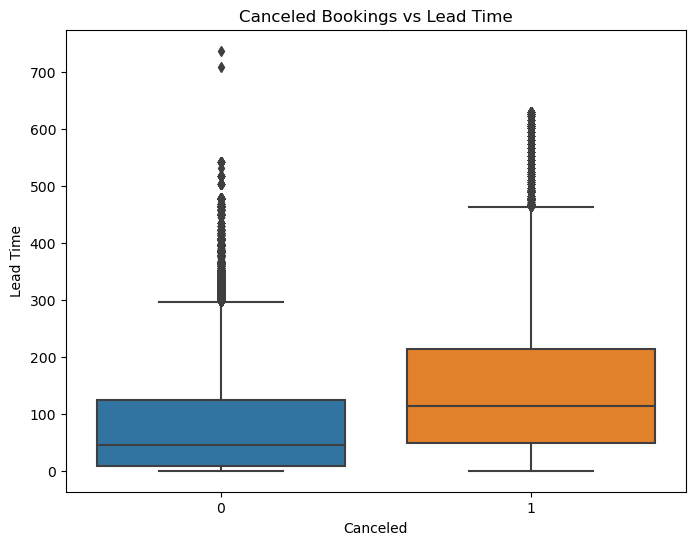

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Canceled Bookings vs Lead Time')
plt.xlabel('Canceled')
plt.ylabel('Lead Time')
plt.show()

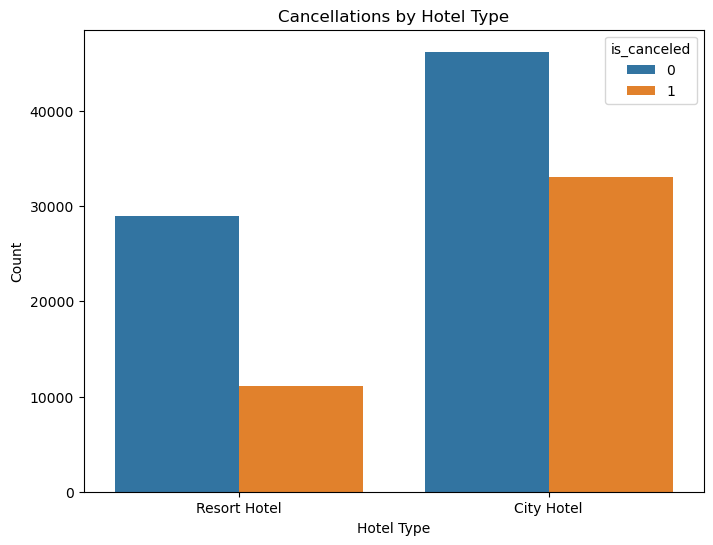

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(df, x='hotel', hue='is_canceled')
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

In [65]:
df.drop(['company','agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [66]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

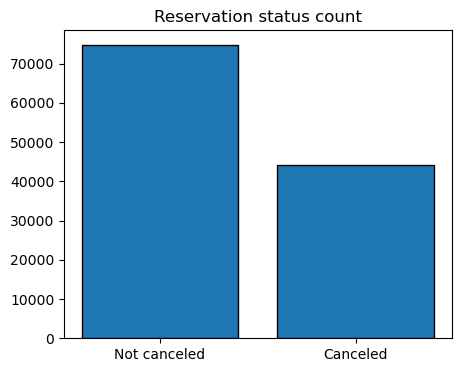

In [67]:
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor = 'k')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [69]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [70]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [72]:
# Calculate cancellation rate
cancellation_rate = (df['is_canceled'].sum() / len(df)) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 37.14%


In [73]:
# Calculate average lead time
average_lead_time = df['lead_time'].mean()
print(f"Average Lead Time: {average_lead_time:.2f} days")

Average Lead Time: 104.31 days


In [74]:
# Calculate occupancy rate
occupied_rooms = df[df['is_canceled'] == 0]['hotel'].count()
total_rooms = len(df)
occupancy_rate = (occupied_rooms / total_rooms) * 100
print(f"Occupancy Rate: {occupancy_rate:.2f}%")

Occupancy Rate: 62.86%


In [75]:
# Calculate average daily rate
average_daily_rate = df['adr'].mean()
print(f"Average Daily Rate (ADR): ${average_daily_rate:.2f}")


Average Daily Rate (ADR): $102.00


In [76]:
# Calculate revenue
revenue = (df['stays_in_weekend_nights'] + df['stays_in_week_nights']) * df['adr']
total_revenue = revenue.sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $42620202.48


In [77]:
# Group data by booking channel and count bookings
booking_channel_performance = df['distribution_channel'].value_counts()
print("Booking Channel Performance:")
print(booking_channel_performance)

Booking Channel Performance:
TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64


In [78]:
# Calculate percentage of repeat guests
repeat_guests = df['is_repeated_guest'].sum()
total_guests = len(df)
percentage_repeat_guests = (repeat_guests / total_guests) * 100
print(f"Percentage of Repeat Guests: {percentage_repeat_guests:.2f}%")

Percentage of Repeat Guests: 3.20%


In [79]:
from sklearn.model_selection import train_test_split

X = df.drop(['is_canceled'], axis=1)  # Features
y = df['is_canceled']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression

columns_to_encode = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode, drop_first=True)

In [81]:
# One-hot encode 'reservation_status'
X_train_encoded = pd.get_dummies(X_train_encoded, columns=['reservation_status'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_encoded, columns=['reservation_status'], drop_first=True)

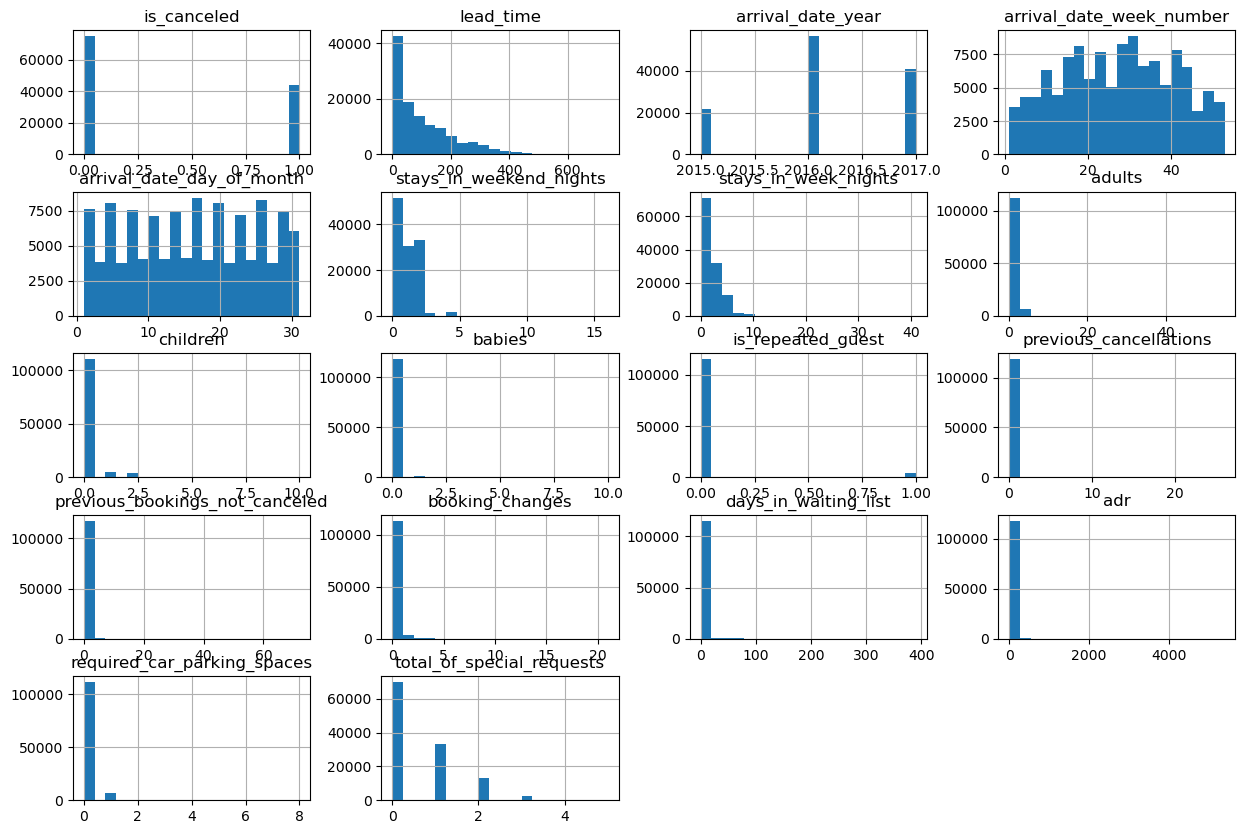

C:\Users\ABC\AppData\Local\Temp\ipykernel_7356\844128733.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


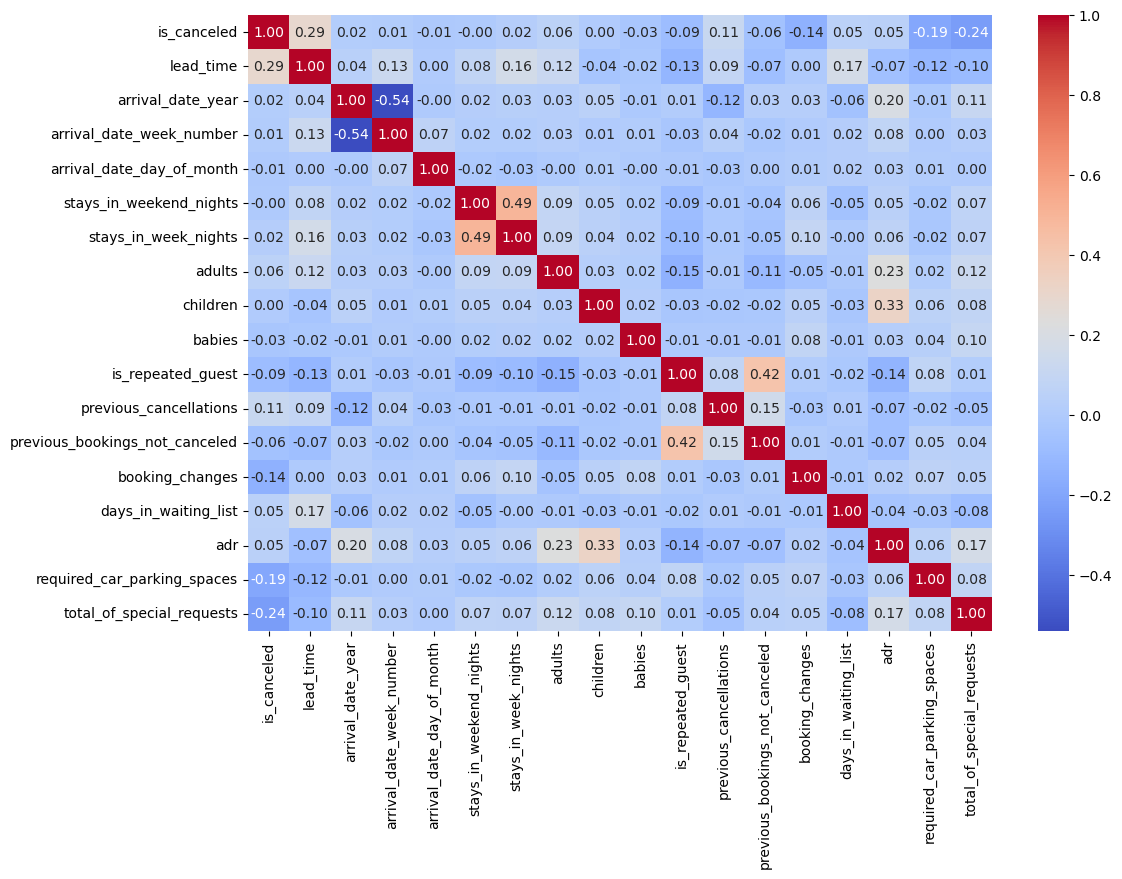

In [82]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [83]:
data = {
    'hotel': ['Resort Hotel', 'Resort Hotel', 'Resort Hotel', 'Resort Hotel', 'Resort Hotel'],
    'is_canceled': [0, 0, 0, 0, 0],
    'lead_time': [342, 737, 7, 13, 14],
    'arrival_date_year': [2015, 2015, 2015, 2015, 2015],
    'arrival_date_month': ['July', 'July', 'July', 'July', 'July'],
    # ... other columns ...
}

df = pd.DataFrame(data)

# Create a mapping from month names to numeric values
month_to_numeric = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Use the map function to replace month names with numeric values
df['arrival_date_month'] = df['arrival_date_month'].map(month_to_numeric)

# Now, the 'arrival_date_month' column contains numeric values from 1 to 12
print(df)

          hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month
0  Resort Hotel            0        342               2015                   7
1  Resort Hotel            0        737               2015                   7
2  Resort Hotel            0          7               2015                   7
3  Resort Hotel            0         13               2015                   7
4  Resort Hotel            0         14               2015                   7


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'df' is your dataset
# Separate the target variable ('is_canceled') from the features
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame to store the one-hot encoded features
X_encoded = pd.DataFrame()

# Perform one-hot encoding for each categorical column
encoder = OneHotEncoder(sparse=False, drop='first')
for col in categorical_columns:
    encoded_col = encoder.fit_transform(X[[col]])
    # Get the feature names for this column
    feature_names = encoder.get_feature_names_out([col])
    encoded_col_df = pd.DataFrame(encoded_col, columns=feature_names)
    X_encoded = pd.concat([X_encoded, encoded_col_df], axis=1)

# Drop the original categorical columns and concatenate the encoded ones
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

# Handle missing values (if any)
X.fillna(0, inplace=True)  # You can choose an appropriate strategy for filling missing values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')











C:\Users\ABC\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 1.0


In [102]:
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [103]:
Y_pred=lr_model.predict(X_test)
score_lr=round(r2_score(Y_test,Y_pred)*100,2)
score_lr

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

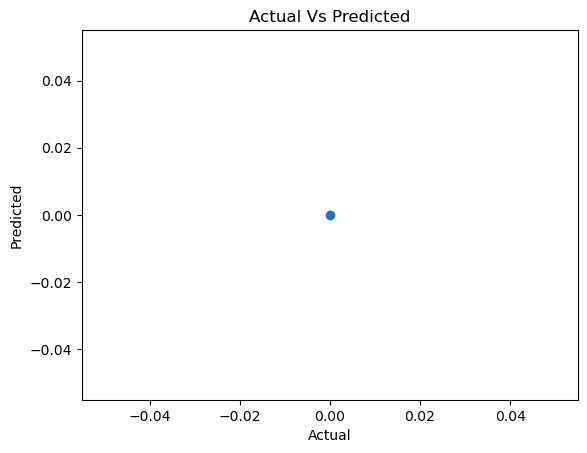

In [104]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual Vs Predicted")
plt.show()

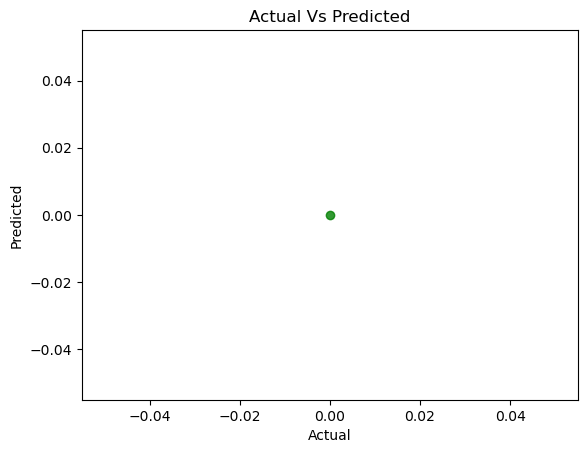

In [105]:
sns.regplot(x=Y_test,y=Y_pred,color ='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual Vs Predicted")
plt.show()

In [106]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, Y_train)
y_predict=model.predict(X_test)
score_rf=round(r2_score(Y_test,y_predict)*100,2)
score_rf

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [114]:
X = df[['lead_time']]
y = df['arrival_date_year']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 0.0
R-squared (R2) Score: nan


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [123]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['arrival_date_year'], test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
DT_Model = DecisionTreeRegressor()

# Train the model on the training data
DT_Model.fit(X_train, y_train)

# Make predictions on the test data
y_predict = DT_Model.predict(X_test)

# Evaluate the model using R-squared (R2) score
score_dtr = round(r2_score(y_test, y_predict) * 100, 2)

print(f'R-squared (R2) Score: {score_dtr}')

R-squared (R2) Score: nan


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


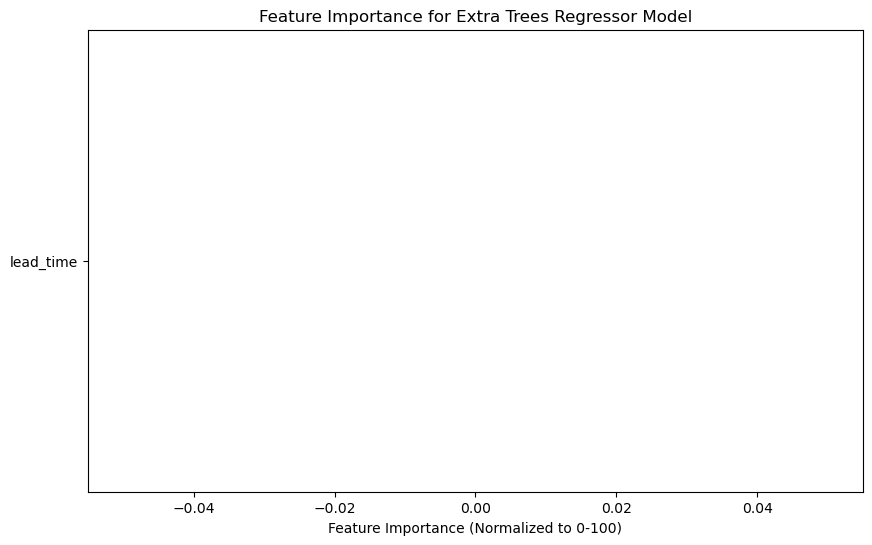

In [127]:
from sklearn.ensemble import ExtraTreesRegressor

# Replace 'Y' with the actual target variable from your dataset
target_variable = 'arrival_date_year'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[target_variable], test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor model with a higher number of estimators
ET_Model = ExtraTreesRegressor(n_estimators=500)

# Train the model on the training data
ET_Model.fit(X_train, y_train)

# Get feature importances
feature_importance = ET_Model.feature_importances_

# Normalize feature importances to a 0-100 scale, handling zero values
max_importance = feature_importance.max()
if max_importance == 0.0:
    feature_importance = 0.0 * feature_importance  # Set all importances to zero
else:
    feature_importance = 100.0 * (feature_importance / max_importance)

# Match feature importances to feature names
feature_names = X.columns

# Create a DataFrame to display feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance (Normalized to 0-100)')
plt.title('Feature Importance for Extra Trees Regressor Model')
plt.show()

In [128]:
importance = ET_Model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000


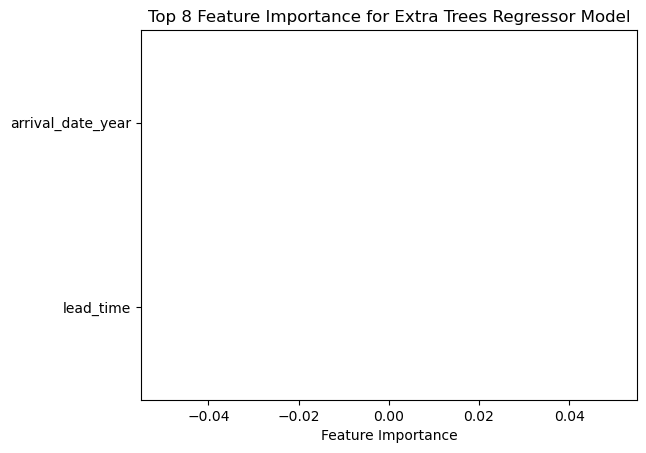

In [97]:
ET_Model = ExtraTreesRegressor(n_estimators=500)

# Train the model on the training data
ET_Model.fit(X_train, Y_train)

# Get feature importances
importance = pd.Series(ET_Model.feature_importances_, index=X.columns)

# Plot the top 8 important features
top_8_features = importance.nlargest(8)
top_8_features.plot(kind='barh', colormap='viridis')
plt.xlabel('Feature Importance')
plt.title('Top 8 Feature Importance for Extra Trees Regressor Model')
plt.show()

In [133]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Create a Linear Regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

In [134]:
X = df[['lead_time', 'arrival_date_year']]
y = df['is_canceled']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.0
R-squared (R2) Score: nan


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [136]:
df.fillna(df.mean(), inplace=True)

C:\Users\ABC\AppData\Local\Temp\ipykernel_7356\820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
